# I. First initiation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt



## Importing dataset  

In [2]:
#Set display options to show all columns
pd.set_option('display.max_columns', None)

#Upload dataset 
df = pd.read_csv(r"E:\downloads\dataset.csv")


In [3]:
df.head(20)


,forecast_time_07,forecast_date_07,city_name,latitude,longtitude,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,temp_kf,humidity,probability_of_precipitation,unit_of_precipitation,value_of_precipitation,weather_main,weather_description,wind_speed,wind_deg,wind_gust,visibility,__updated_at
0,2024-02-08 19:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,14.00,13.31,13.13,14.00,1018.0,1018.0,1017.0,0.87,71.0,0.00,3h,0.0,Clouds,mây đen u ám,3.85,30.0,6.22,10000.0,2024-02-08 18:53:32.227763
1,2024-02-08 22:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,13.60,12.84,12.81,13.60,1019.0,1019.0,1019.0,0.79,70.0,0.00,3h,0.0,Clouds,mây đen u ám,3.04,28.0,5.60,10000.0,2024-02-08 18:53:32.227955
2,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.89,10.20,10.89,10.89,1019.0,1019.0,999.0,0.00,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.65,63.0,4.46,10000.0,2024-02-08 18:53:32.229873
3,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.74,10.04,10.45,10.74,1020.0,1020.0,1001.0,0.29,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.62,57.0,4.73,10000.0,2024-02-08 18:53:32.229873
4,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,14.01,13.29,12.34,14.01,1018.0,1018.0,1017.0,1.67,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.34,33.0,7.24,10000.0,2024-02-08 18:53:32.230857
5,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,13.43,12.63,12.26,13.43,1019.0,1019.0,1019.0,1.17,69.0,0.00,3h,0.0,Clouds,mây đen u ám,4.15,29.0,6.99,10000.0,2024-02-08 18:53:32.230857
6,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,14.03,13.34,12.61,14.03,1018.0,1018.0,1017.0,1.42,71.0,0.00,3h,0.0,Clouds,mây đen u ám,4.48,28.0,7.05,10000.0,2024-02-08 18:53:32.232857
7,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,13.54,12.78,12.55,13.54,1019.0,1019.0,1020.0,0.99,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.03,24.0,6.72,10000.0,2024-02-08 18:53:32.232857
8,2024-02-08 22:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.85,10.00,10.85,10.98,1022.0,1022.0,1000.0,-0.13,77.0,0.00,3h,0.0,Clouds,mây đen u ám,0.95,54.0,2.56,10000.0,2024-02-08 18:53:32.233840
9,2024-02-08 19:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.78,9.95,10.78,10.78,1021.0,1021.0,998.0,0.00,78.0,0.00,3h,0.0,Clouds,mây đen u ám,1.44,100.0,3.35,10000.0,2024-02-08 18:53:32.233840


In [4]:
df.shape

(35901, 24)

=> The dataset has 35901 rows and 24 columns

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35901 entries, 0 to 35900
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   forecast_time_07              35901 non-null  object 
 1   forecast_date_07              35901 non-null  object 
 2   city_name                     35901 non-null  object 
 3   latitude                      35901 non-null  float64
 4   longtitude                    35901 non-null  float64
 5   temp                          35901 non-null  float64
 6   feels_like                    35901 non-null  float64
 7   temp_min                      35901 non-null  float64
 8   temp_max                      35901 non-null  float64
 9   pressure                      35901 non-null  float64
 10  sea_level                     35901 non-null  float64
 11  grnd_level                    35901 non-null  float64
 12  temp_kf                       35901 non-null  float64
 13  h

# II. EDA 

## Labeling output 

We can see in dataset that the weather_main shows 3 results of weather which are: clouds, clear and rain. Thus, we can use this column to display output label for model. 

Because weather_main has object datatype, so we need to convert it into numerical values by using Label Encoding  

In [19]:
#Labeling output data  
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['weather_main_encoded'] = label_encoder.fit_transform(df['weather_main'])

#Inspecting labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:")
print(label_mapping)



Label mapping:
{'Clear': 0, 'Clouds': 1, 'Rain': 2}


## Reducing reduntdant columns

Also we need to eliminate some redundant features to ensure that our model works properly. By exprience we can show that weather_description and visibility have nothing efffects on our model. So let's drop those columns. Consider that the unit_of_precipitation data only indicates the measured-period time for precipitation. So we can drop this column due to its low impact on our model. 

In [7]:
# Drop the redundant columns
redundant_columns = ['weather_description', 'visibility', 'unit_of_precipitation']
df_reduced = df.drop(columns=redundant_columns)

After that, we need to reformat the time and date in columns 'forecast_time_07', 'forecast_date_07'.

In [9]:
df['forecast_time_07'] = pd.to_datetime(df['forecast_time_07'])
df['forecast_date_07'] = pd.to_datetime(df['forecast_date_07'])
#df['_updated_at']      = pd.to_datetime(df['_updated_at'])

## Handling missing values

Now we come to next stage, identifying missing data.

In [10]:
#Identify missing values
missing_data = df.isnull().sum()
print("Missing values in each column: ")
print(missing_data)

#Percentage of missing values
missing_data_percent = (df.isnull().sum() / len(df))*100
print("Percentage of missing values in each column: ")
print(missing_data_percent)

Missing values in each column: 
forecast_time_07                0
forecast_date_07                0
city_name                       0
latitude                        0
longtitude                      0
temp                            0
feels_like                      0
temp_min                        0
temp_max                        0
pressure                        0
sea_level                       0
grnd_level                      0
temp_kf                         0
humidity                        0
probability_of_precipitation    0
unit_of_precipitation           0
value_of_precipitation          0
weather_main                    0
weather_description             0
wind_speed                      0
wind_deg                        0
wind_gust                       0
visibility                      0
__updated_at                    0
weather_main_encoded            0
dtype: int64
Percentage of missing values in each column: 
forecast_time_07                0.0
forecast_date_07       

Retriving the result that there are no missing values in our dataset, we move to the next step.

## Visualizing data

### Overview histograms 

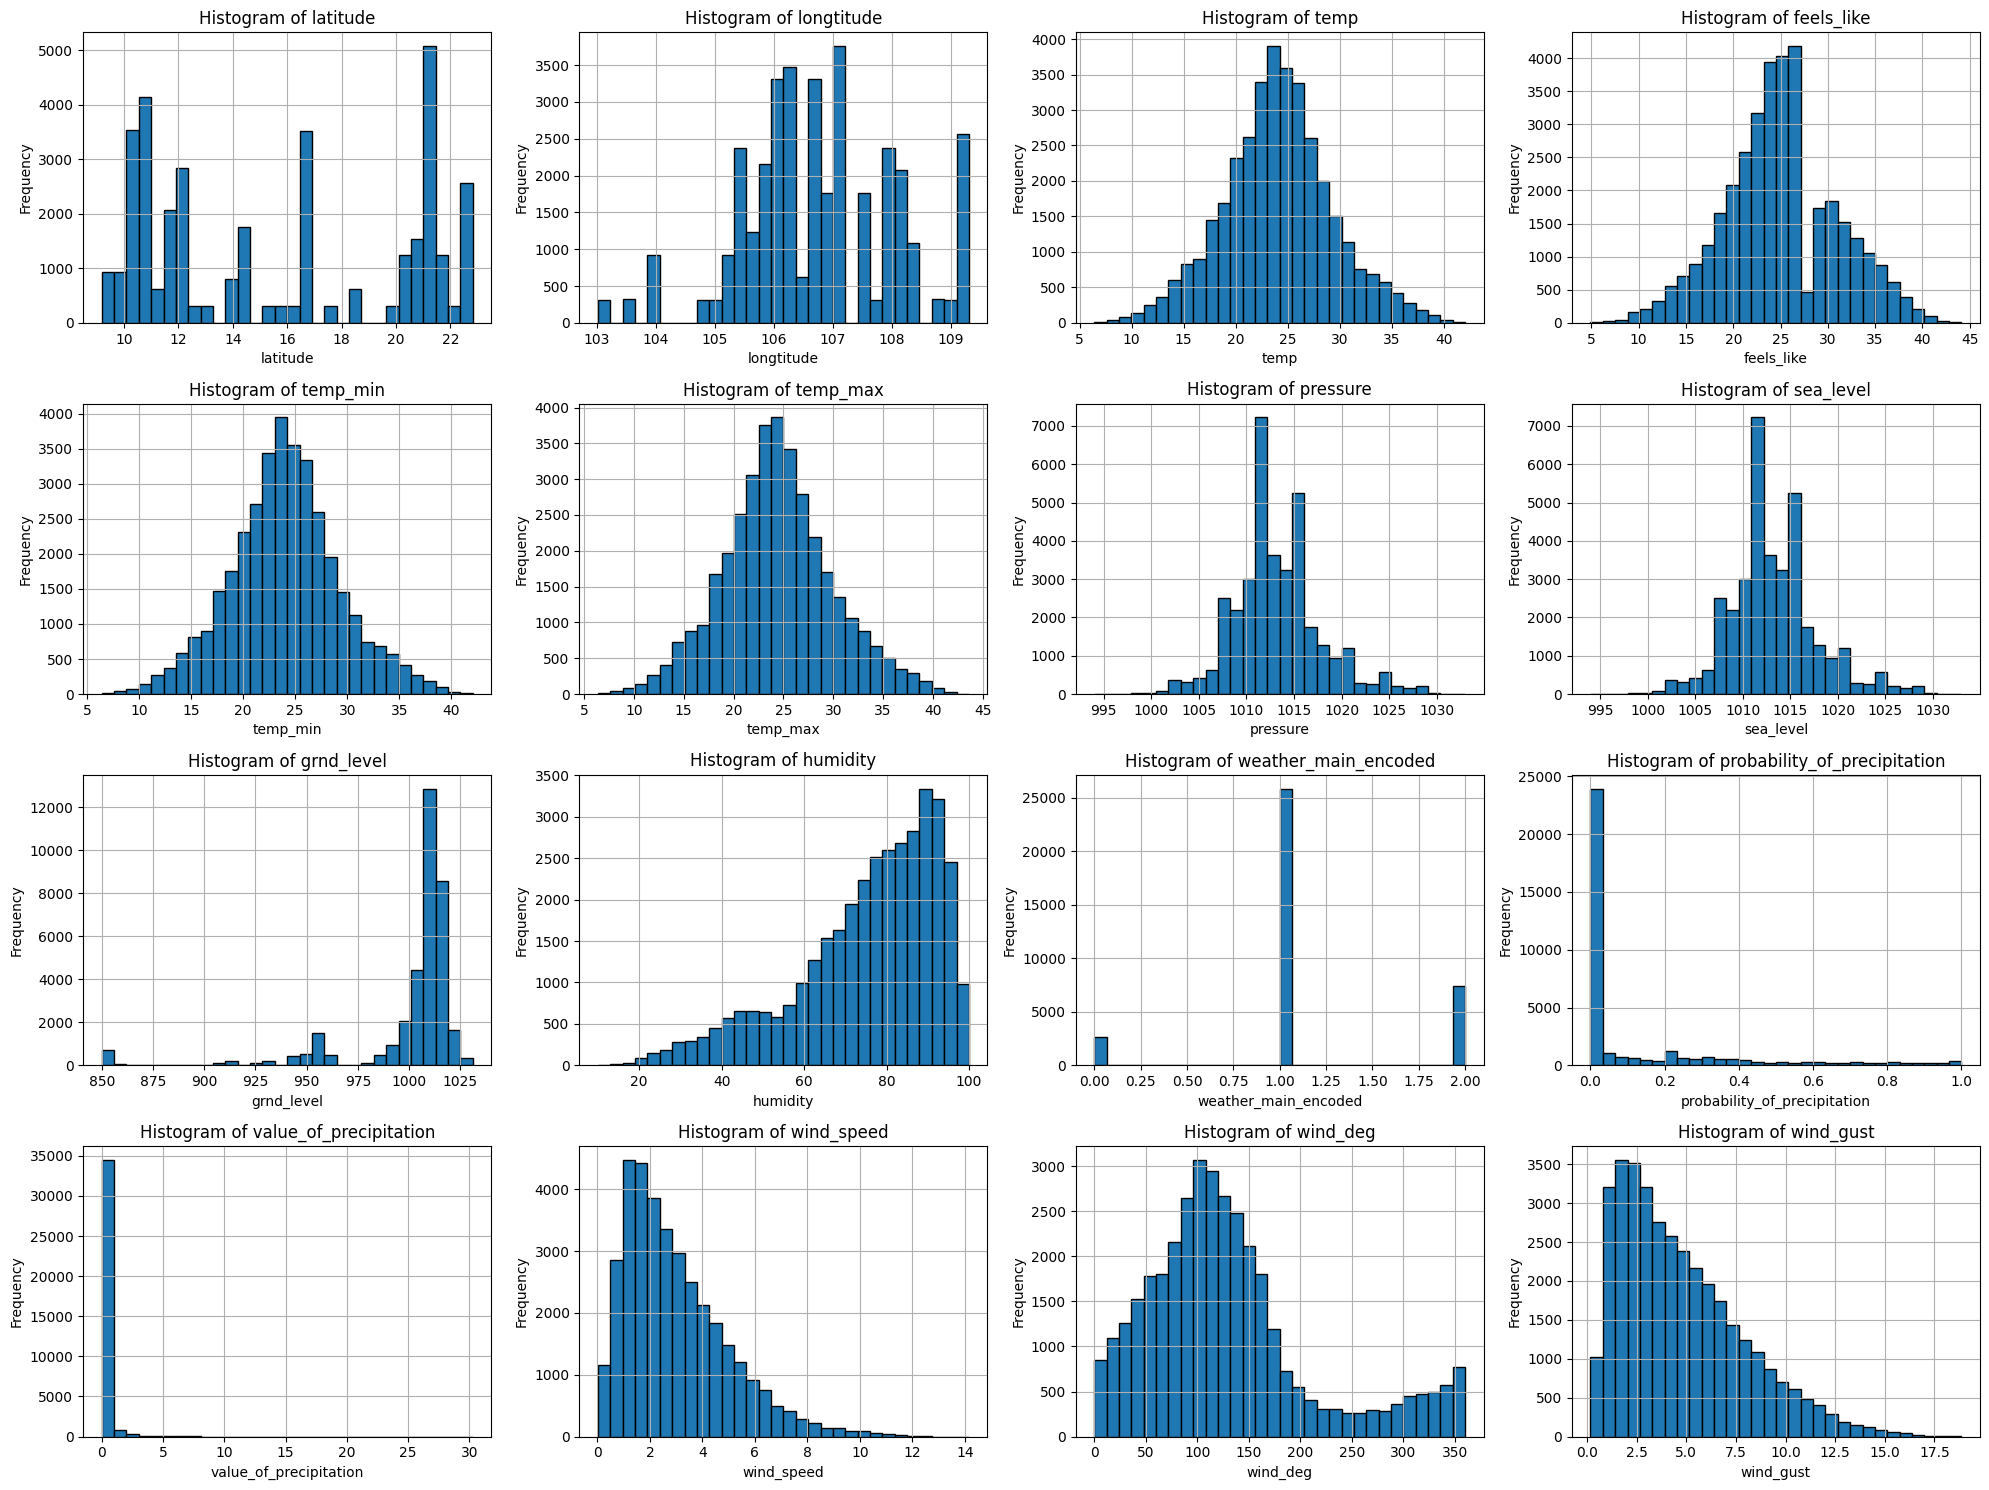

In [24]:
numerical_columns = ['latitude', 'longtitude', 'temp', 'feels_like', 'temp_min', 'temp_max', 
                     'pressure', 'sea_level', 'grnd_level', 'humidity', 'weather_main_encoded',
                     'probability_of_precipitation', 'value_of_precipitation', 
                     'wind_speed', 'wind_deg', 'wind_gust']

#Creating histograms
plt.figure(figsize=(20,15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    df[column].hist(bins = 30, edgecolor = 'black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Shown plots demonstrate great overview for data analysis. We can observe that 

# III. Methods